# Analyzing [EDA Aviation Accidents Database]
## Data Science Project
### A Comprehensive Analysis using Pandas, Matplotlib, and Seaborn
- **Simiyu David Masai**
- **Moringa School**  
- **25/11/2024**


In [528]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv


### 1. Loading the dataset and getting information

In [529]:
#load data
data=pd.read_csv('C:\\Users\\admin\\Desktop\\end_phase project\\End_of_phase1_project\\technical_presentation\\AviationData.csv', encoding='ISO-8859-1', engine='python')


In [530]:
#Getting a quick overview of the data
#first 5 rows and columns
data.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [531]:
#last 5 rows and columns
data.tail(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Observation : the dataset values are not uniform

In [532]:
#more information on datatypes about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [533]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [534]:
#check data type using dtypes
data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [535]:
#checking the shape of the dataset
data.shape
#there as 88889 rows and 31 columns

(88889, 31)

In [536]:
#concise stat
data.describe().T
#but there are missing values

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [537]:
#check columns
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 2. Data Cleaning

This step involves dropping columns not necessary in this analysis and cleaning the desired columns and rows

In [538]:
#create a copy of my dataset before performing cleaning which will involve dropping columns and rows
#Create a dataframe copy to be used in data cleaning
df = data.copy(deep = True)

In [539]:
#checking number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [540]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [541]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [542]:
#dropping unnnecessary columns to the analysis
#dropping columns with more than 50% missing values
#retaining important columns like Aircraft.Category even with 50% missing values
df=data.drop(columns=['Event.Date','Event.Id','Airport.Name','Purpose.of.flight','Airport.Code','Schedule','Investigation.Type','Accident.Number','Latitude','Longitude','Registration.Number','FAR.Description','Air.carrier','Publication.Date'])

In [543]:
#filter the DataFrame to Focus on America 
df=df[df['Country']=='United States']

In [544]:
df.head()

,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [545]:
#info on modified new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                82237 non-null  object 
 1   Country                 82248 non-null  object 
 2   Injury.Severity         82140 non-null  object 
 3   Aircraft.damage         80269 non-null  object 
 4   Aircraft.Category       28154 non-null  object 
 5   Make                    82227 non-null  object 
 6   Model                   82210 non-null  object 
 7   Amateur.Built           82227 non-null  object 
 8   Number.of.Engines       80373 non-null  float64
 9   Engine.Type             79206 non-null  object 
 10  Total.Fatal.Injuries    71594 non-null  float64
 11  Total.Serious.Injuries  70873 non-null  float64
 12  Total.Minor.Injuries    71519 non-null  float64
 13  Total.Uninjured         77243 non-null  float64
 14  Weather.Condition       81603 non-null  obj

In [546]:
#Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,80373.000000,71594.000000,70873.000000,71519.000000,77243.000000
mean,1.135481,0.421683,0.257178,0.332974,4.302448
std,0.427286,2.433647,1.144189,1.306604,23.794728
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000


In [547]:
#Describe categorical features

df.describe(include='object')

,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Weather.Condition,Broad.phase.of.flight,Report.Status
count,82237,82248,82140,80269,28154,82227,82210,82227,79206,81603,61158,79637
unique,23030,1,56,4,14,8001,11443,2,11,4,12,16974
top,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Airplane,Cessna,152,No,Reciprocating,VMC,Landing,Probable Cause
freq,434,82248,64870,61675,24229,21573,2323,73906,68507,75317,15365,61189


In [548]:
#check the colunms in new DataFrame
#check the colunms
df.columns

Index(['Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [549]:
#Change columns name to lower case for unifromity
df.columns = df.columns.str.lower()
df.columns

Index(['location', 'country', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'make', 'model', 'amateur.built',
       'number.of.engines', 'engine.type', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status'],
      dtype='object')

In [550]:

# Replacing dots in column names with underscores
df.columns = [col.replace('.', '_') for col in df.columns]

In [551]:
df.columns

Index(['location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status'],
      dtype='object')

In [552]:
#dropping further columns not useful in my analysis

# Drop the specified columns in place
df.drop(['report_status'], axis=1, inplace=True)

# Check the updated DataFrame
print(df.head())

          location        country injury_severity aircraft_damage  \
0  MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1   BRIDGEPORT, CA  United States        Fatal(4)       Destroyed   
2    Saltville, VA  United States        Fatal(3)       Destroyed   
3       EUREKA, CA  United States        Fatal(2)       Destroyed   
4       Canton, OH  United States        Fatal(1)       Destroyed   

  aircraft_category      make     model amateur_built  number_of_engines  \
0               NaN   Stinson     108-3            No                1.0   
1               NaN     Piper  PA24-180            No                1.0   
2               NaN    Cessna      172M            No                1.0   
3               NaN  Rockwell       112            No                1.0   
4               NaN    Cessna       501            No                NaN   

     engine_type  total_fatal_injuries  total_serious_injuries  \
0  Reciprocating                   2.0                     0.0

### 2.2 Checking the missing values, duplicates and dealing with them

In [553]:
#check the missing values in each column
df.isnull().sum()

location                     11
country                       0
injury_severity             108
aircraft_damage            1979
aircraft_category         54094
make                         21
model                        38
amateur_built                21
number_of_engines          1875
engine_type                3042
total_fatal_injuries      10654
total_serious_injuries    11375
total_minor_injuries      10729
total_uninjured            5005
weather_condition           645
broad_phase_of_flight     21090
dtype: int64

In [554]:
# an overview our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                82237 non-null  object 
 1   country                 82248 non-null  object 
 2   injury_severity         82140 non-null  object 
 3   aircraft_damage         80269 non-null  object 
 4   aircraft_category       28154 non-null  object 
 5   make                    82227 non-null  object 
 6   model                   82210 non-null  object 
 7   amateur_built           82227 non-null  object 
 8   number_of_engines       80373 non-null  float64
 9   engine_type             79206 non-null  object 
 10  total_fatal_injuries    71594 non-null  float64
 11  total_serious_injuries  70873 non-null  float64
 12  total_minor_injuries    71519 non-null  float64
 13  total_uninjured         77243 non-null  float64
 14  weather_condition       81603 non-null  obj

In [555]:
#Location columns
#imputting 'unknown' as a fized value in the column

df['location'].fillna('unknown',inplace=True)
df['location'].isna().sum() #all null values are removed

C:\Users\admin\AppData\Local\Temp\ipykernel_11156\1961790175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('unknown',inplace=True)


np.int64(0)

In [556]:
#we just want t2o values fatal or non-fatal values
# Now replace all records of Fatal(n) with 'Fatal'
df['injury_severity'] = df['injury_severity'].replace(to_replace=r'Fatal\(\d+\)', value='Fatal', regex=True)

df['injury_severity']=df['injury_severity'].replace('Serious','Fatal')

df['injury_severity']=df['injury_severity'].replace('Minor','Non-Fatal')

#check to see if Fatal(n) have been changed
df['injury_severity'].head(5)

# Nan values were 108, drop rows with NaN values in 'injury_severity'
df = df.dropna(subset=['injury_severity'])

print(df['injury_severity'].value_counts())


injury_severity
Non-Fatal      65073
Fatal          15179
Incident        1873
Unavailable       15
Name: count, dtype: int64


In [557]:
# Filter rows when 'injury_severity' is 'Incident' and select 'aircraft_damage'
# Filtering rows where injury_severity is 'Incident' and checking how different levels of aircraft_damage (Minor, Substantial, Destroyed) correlate with injury_severity.
#if minor impute values i.e 1179 to non-fatal values
#if substantial and destroyed impute 7  to fatal

print(df['injury_severity'].value_counts())

new = df[df['injury_severity'] == 'Incident'][['aircraft_damage','injury_severity']]
print(new.value_counts())
#when aircraft damage waas minor there were 1179 we can add as the non_fatal in the injury_severtiy column and delete records of incident
#when aircraft damage was substantial or destroyed we can impute as fatal in the injury_severtiy column and delete records of incident

# Impute 'injury_severity' for 'Incident' rows based on 'aircraft_damage'

df.loc[(df['aircraft_damage'] == 'Minor') & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Non-Fatal'
df.loc[(df['aircraft_damage'] == 'Substantial')  & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Fatal'
df.loc[(df['aircraft_damage'] ==  'Destroyed') & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Fatal'

#using total_fatal_injuries to check the injury_severity
by_fatality = df[(df['injury_severity'] == 'Incident') & (~df['total_fatal_injuries'].isna())][['total_fatal_injuries','injury_severity']]
by_fatality[by_fatality['total_fatal_injuries']==1]
by_fatality.dropna() 

#impute non-fatal in injury_severity where total_fatal_injuries =0
#impute fatal to injury_severity where total_fatal_injuries=1
df.loc[(by_fatality['total_fatal_injuries'] == 0) & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Non-Fatal'
df.loc[(by_fatality['total_fatal_injuries'] == 1) & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Fatal'

#using total_serious_injuries  to check the injury_severity
#impute fatal if serious_injury=1 else non-fatal = 0
by_serious_injury= df[(df['injury_severity'] == 'Incident') & (~df['total_serious_injuries'].isna())][['total_serious_injuries','injury_severity']]
df.loc[(by_serious_injury['total_serious_injuries'] == 0) & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Non-Fatal'
df.loc[(by_serious_injury['total_serious_injuries'] == 1) & (df['injury_severity'] == 'Incident'), 'injury_severity'] = 'Fatal'



# check the result after imputation
print(df['injury_severity'].value_counts())

#Filtering rows where injury_severity is 'unavailable' and checking how different levels of aircraft_damage (Minor, Substantial, Destroyed) correlate with injury_severity.

# Step 1: Impute based on 'aircraft_damage'
df.loc[(df['aircraft_damage'] == 'Minor') & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Non-Fatal'
df.loc[(df['aircraft_damage'].isin(['Substantial', 'Destroyed'])) & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Fatal'

# Step 2: Impute based on 'total_fatal_injuries'
df.loc[(df['total_fatal_injuries'] == 0) & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Non-Fatal'
df.loc[(df['total_fatal_injuries'] == 1) & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Fatal'

# Step 3: Impute based on 'total_serious_injuries'
df.loc[(df['total_serious_injuries'] == 0) & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Non-Fatal'
df.loc[(df['total_serious_injuries'] == 1) & (df['injury_severity'] == 'Unavailable'), 'injury_severity'] = 'Fatal'

# Final counts for 'injury_severity'

print(df['injury_severity'].value_counts())








injury_severity
Non-Fatal      65073
Fatal          15179
Incident        1873
Unavailable       15
Name: count, dtype: int64
aircraft_damage  injury_severity
Minor            Incident           1193
Substantial      Incident              6
Destroyed        Incident              4
Name: count, dtype: int64
injury_severity
Non-Fatal      66770
Fatal          15203
Incident         152
Unavailable       15
Name: count, dtype: int64
injury_severity
Non-Fatal    66770
Fatal        15218
Incident       152
Name: count, dtype: int64


In [558]:
#make columns
print(df.make.isna().sum())
#2 missing values in a category of planes, drop it affects analysis when make is unknown
df.dropna(subset='make',inplace=True)
#check
print(df['make'].isna().sum())
print(df['make'].value_counts())
#CESSNA similar to Cessna only thats in Uppercase
# Convert the 'make' column to lowercase
df['make'] = df['make'].str.lower()
#print the value counts after normalizing the case
print(df['make'].value_counts())


15
0
make
Cessna                   21572
Piper                    11661
CESSNA                    4264
Beech                     4167
PIPER                     2504
                         ...  
Walter Chandler              1
Rans Company                 1
Hagerty                      1
ECLIPSE AEROSPACE INC        1
SCHMIDT RANDALL M            1
Name: count, Length: 7996, dtype: int64
make
cessna                            25836
piper                             14165
beech                              5055
bell                               2283
boeing                             1455
                                  ...  
rhinehart                             1
scott terry g                         1
peryera arnet                         1
balcomb kenneth c iii                 1
aeroprakt manufacturing sp zoo        1
Name: count, Length: 7399, dtype: int64


In [559]:
# aircraft_category column represents aeroplanes in our data
print(df['aircraft_category'].isna().sum())
print(df['aircraft_category'].value_counts())



# using the relationship between make,model and number of engines to fil some null values
# step 1 by 'make'
# use the relationship between make and aircraft_category to fill missing values
# using make to manually fill missing values 
df.make.value_counts()
airplanes = [
    'socata', 'cirrus', 'dehavilland', 'lockheed', 'globe', 'weatherly',
    'learjet', 'schempp-hirth', 'ercoupe', 'wsk pzl mielec', 'aerostar',
    'raven', 'airbus', 'navion','cessna','piper','pitts', 'british aerospace',
    'aviat aircraft inc', 'american', 'diamond aircraft ind inc',
    'rockwell international', 'cirrus design corp.', 'raytheon aircraft company',
    'great lakes', 'gulfstream', 'mbb', 'gates learjet', 'grumman acft eng cor-schweizer',
    'canadair', 'american champion aircraft', 'gulfstream american',
    'boeing stearman', 'smith, ted aerostar', 'flight design gmbh',
    'grumman american avn. corp.', 'bombardier inc', 'aerotek', 'fokker',
    'bombardier', 'ayres corporation', 'pilatus', 'yakovlev', 'christen industries',
    'rolladen-schneider', 'diamond',    'kitfox', 'bensen', 'pitts special', 'jones', 'rotec', 'burkhart grob flugzeugbau', 
    'aerostar international', 'czech aircraft works spol sro', 'christen industries inc', 
    'columbia aircraft mfg', 'consolidated-vultee', 'nanchang', 'aerostar international inc', 
    'kolb', 'cameron balloons us', 'dassault aviation', 'atr', 'ultramagic', 
    'airborne windsports pty ltd', 'titan', 'howard aircraft corp.', 'pterodactyl', 'eagle', 
    'mitchell', 'cassutt', 'pietenpol', 'commander', 'remos aircraft gmbh', 'naval aircraft factory', 
    'aerofab inc.', 'air & space', 'morrisey', 'textron aviation inc', 'thrush aircraft inc', 
    'weedhopper', 'brown', 'young', 'vans aircraft inc', 'pzl-bielsko', 'czech sport aircraft as', 
    'maxair', 'hawker beechcraft corp', 'bede aircraft', 'centrair', 'tecnam', 'curtiss wright', 
    'aeropro cz', 'fisher', 'anderson aircraft corp.', 'universal stinson', 'velocity', 'erco', 
    'clark', 'extra', 'hall', 'mcculloch', 'hispano aviacion', 'aircraft mfg & dev. co. (amd)', 
    'taylor', 'extra flugzeugbau gmbh', 'bushby', 'blanik', 'partenavia', 'avid aircraft', 
    'fairchild swearingen', 'rose', 'north wing', 'aviat inc', 'gulfstream american corp', 
    'grob', 'aero vodochody aero. works', 'evans aircraft', 'nord (sncan)', 'starduster', 
    'meyers aircraft co.', 'steen', 'weber', 'american aerolights', 'williams', 'chance vought', 
    'american champion', 'lindstrand', 'piccard', 'wilson', 'monnett', 'mooney airplane co inc', 
    'rans, inc.', 'raytheon corporate jets', 'lancair company',    'saab-scania ab (saab)', 'consolidated aeronautics inc.', 'alon', 
    'fairchild hiller', 'siai-marchetti', 'republic', 'convair', 'mooney aircraft corp.',
    'quicksilver', 'american champion (acac)', 'snow', 
    'costruzioni aeronautiche tecna', 'short brothers', 'evektor-aerotechnik as',
    'glasflugel', 'continental copters', 'temco', 'britten-norman', 'flight design',
    'beechcraft', 'israel aircraft industries', 'i.c.a. brasov', 'smith', 'stearman',
    'callair', 'hawker siddeley', 'gulfstream-schweizer', 'cameron balloons',
    'american aviation', 'dornier', 'cessna aircraft co', 'varga', 'thunder and colt',
    'american aviation corp. (aac)', 'pzl-mielec', 'dassault', 'raytheon', 'piper aircraft inc',
    'garlick', 'bombardier, inc.', 'eiriavion oy', 'engineering & research', 'curtiss-wright',
    'silvaire', 'cubcrafters inc', 'schweizer aircraft corp', 'interstate', 'cub crafters inc',
    'barnes', 'extra flugzeugbau', 'glaser-dirks', 'aero vodochody', 'cub crafters', 
    'lindstrand balloons', 'sukhoi', 'eipper', 'dassault-breguet', 'culver', 'artic aircraft corp.',
    'gulfstream aerospace', 'rans', 'american legend aircraft co', 'adams', 'pipistrel', 
    'airborne', 'classic aircraft corp.', 'american general aircraft', 'forney', 'fleet', 
    'buckeye', 'burkhart grob flugzeugbau', 'consolidated-vultee', 'columbia aircraft mfg',
    'air creation', 'czech aircraft works spol sro', 'nanchang', 'aerostar international',
    'aerostar international inc', 'ultramagic', 'dassault aviation', 'eagle', 
    'christen industries inc', 'airborne windsports pty ltd', 'naval aircraft factory', 
    'commander', 'atr', 'remos aircraft gmbh', 'aerofab inc.', 'air & space',
    'boeing','mooney','grumman','bellanca',
    'glider','north american', 'aerospatiale', 'rockwell', 'grumman american', 'douglas', 'air tractor inc', 'ayres', 'cirrus design corp', 
    'beech','North American', 'Aerospatiale', 'Rockwell', 'Douglas', 'Air Tractor Inc', 'Ayres', 'Grumman American',
    'schweizer', 'air tractor', 'aeronca', 'maule', 'champion','mcdonnell douglas', 'stinson', 'luscombe', 'aero commander','taylorcraft', 'de havilland',
    'embraer', 'fairchild', 'schleicher', 'lake', 'waco', 'aviat', 'mitsubishi', 'let', 'grumman-schweizer', 'burkhart grob', 'ryan', 'helio', 'airbus industrie'
]
helicopter=[
        'brantly helicopter', 'mcdonnell douglas helicopter', 'texas helicopter', 'md helicopter',
    'bell helicopter textron', 'eurocopter deutschland gmbh', 'bell helicopter textron canada',
    'robinson helicopter co', 'mcdonnell douglas heli co', 'texas helicopter corp', 'garlick helicopters inc', 
    'hiller-soloy', 'powrachute', 'thompson', 'monocoupe aircraft', 'american legend',
    'bell','hughes','Hiller', 'Enstrom', 'Robinson Helicopter','robinson','agusta',
    'hiller', 'enstrom', 'robinson helicopter', 'agusta', 'eagle aircraft co.', 'eurocopter france','grumman american', 
    'douglas', 'air tractor inc', 'ayres', 'cirrus design corp', 'eurocopter', 'robinson helicopter company', 'sikorsky'
]

df.loc[(df['aircraft_category'].isna()) & (df['make'].isin(airplanes)), 'aircraft_category'] = 'Airplane'
df.loc[(df['aircraft_category'].isna()) & (df['make'].isin(helicopter)), 'aircraft_category'] = 'Helicopter'


# check
print(df['aircraft_category'].isna().sum())
print(df['aircraft_category'].value_counts())



#impute using a fixed value the remaining planes
df['aircraft_category'].fillna('Unknown',inplace=True)

#drop all unknown values
df.drop(df[df['aircraft_category'] == 'Unknown'].index, inplace=True)

#check
df['aircraft_category'].unique()





54061
aircraft_category
Airplane             24142
Helicopter            2720
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64
5592
aircraft_category
Airplane             68906
Helicopter            6425
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_11156\3800233970.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aircraft_category'].fillna('Unknown',inplace=True)


array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [560]:
#use amateur_built to filter out plane,model and built data
df.drop(df[df['amateur_built'] == 'Yes'].index, inplace=True)

#drop the column
df.drop('amateur_built',axis=1,inplace=True)



In [561]:
#model column
print(df.model.isna().sum())
#some overlapping models
#there are 7 missing values, we will drop them 
#drop the missing model values
df.dropna(subset='model',inplace=True)
#check
print(df.model.isna().sum())

6
0


In [562]:
#number_of_engines column
print(df['number_of_engines'].isna().sum())
no_engine=df[df['number_of_engines'].isna()][['make','model']]

#using manual imputation to fill this values
# Aircraft with no engines (gliders and balloons)
no_engines_aircraft = ['Schweizer', 'Balloon Works', 'Let','I.C.A. Brasov','Burkhart Grob','Cameron','Rolladen-Schneider', 'Schleicher','schempp-hirth' ]
no_engine=[char.lower() for char in no_engines_aircraft]

# Aircraft with one engine
one_engine_aircraft = ['Beech', 'Cirrus', 'Cessna','Bell','piper']
one_engine=[char.lower() for char in one_engine_aircraft]
one_model=["C-23", "90", "F35", "B19", "D35", "A36", "35", "F33", "V35", "23"
    "RX-7", "S-66A", "S-60A", "RX-8", "RAVEN 560", "S-77A", "S-81-A", "RAVEN S49A", 
    "RAVEN S57-A", "RX 8", "RXS-8", "S-55A", "RALLY RX-8", "RALLY RX-7", "S-71A", 
    "RX-9",'RX-7', 'RX-6', 'AX-9', 'S60A', 'S77A','S55A','AX7',' R-7 '
           ]

# Aircraft with 2 engines
two_engines = [
    "B-737-500", "B-737-201", "767-300ER", "757", 
    "737-500", "E75", "B75N1", "737-300", "737-400", 
    "B757", "737-300", "737-322", "737-300", "737-700", 
    "737", "757-232", "737-700", "B757-200", "757-200", 
    "737-300", "787", "757", "E75", "A75N1(PT17)", 
    "767 424ER", "737", "767", "707 338C", "767 432ER", 
    "767", "737", "757", "747", "757", "787", 
    "737", "B75", "777",'CL 600 2C10','CL-600-2D24','CL-600-2B19'
]

two_engines_brand=['embraer']

# Aircraft with 4 engines
four_engines = ["747"]


#imputting
df.loc[(df['number_of_engines'].isna()) & (df['make'].isin(no_engine)), 'number_of_engines'] = 0.0
df.loc[(df['number_of_engines'].isna()) & (df['make'].isin(one_engine_aircraft) | df['model'].isin(one_model)), 'number_of_engines'] = 1.0
df.loc[(df['number_of_engines'].isna()) & (df['model'].isin(two_engines)) | df['make'].isin(two_engines_brand), 'number_of_engines'] = 2.0
df.loc[(df['number_of_engines'].isna()) & (df['model'].isin(four_engines)), 'number_of_engines'] = 4.0

#dropping the remaining Null values
df['number_of_engines'].dropna(inplace=True)

#check
print(df['number_of_engines'].isna().sum())

1423
757


In [563]:
#weather conditions column
print(df.weather_condition.isna().sum())
#we cannot assume the weather during a crash so we will drop this values so as not to influence our analysis
#dropping this column
df.drop('weather_condition',axis=1,inplace=True)


571


In [564]:
# broad_phase_of_flight
df['broad_phase_of_flight']
#name is too long edit
df.columns=df.columns.str.replace('broad_phase_of_flight','phase_of_flight')
#check
df.columns

Index(['location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'number_of_engines',
       'engine_type', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'phase_of_flight'],
      dtype='object')

In [565]:
#checking null values in phase_of_flight column

df['phase_of_flight'].isna().sum()

#impute mean with fixed value
df['phase_of_flight'].fillna('Unknown',inplace=True)

#check

df['phase_of_flight'].isna().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_11156\3951411980.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phase_of_flight'].fillna('Unknown',inplace=True)


np.int64(0)

In [566]:
#drop another column
df.drop('engine_type',axis=1,inplace=True)

In [567]:
#drop some additional column not useful in our analysis
df.drop(['total_serious_injuries','total_minor_injuries','total_uninjured'],axis=1,inplace=True)
#dealt with all null values in dataframe
df.isna().sum()

location                   0
country                    0
injury_severity            0
aircraft_damage         1765
aircraft_category          0
make                       0
model                      0
number_of_engines        757
total_fatal_injuries    9221
phase_of_flight            0
dtype: int64

In [568]:
#create copy for Exploratory Data Analysis
df_eda = df.copy(deep=True)
df_eda.head(10)

,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,total_fatal_injuries,phase_of_flight
0,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,stinson,108-3,1.0,2.0,Cruise
1,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,piper,PA24-180,1.0,4.0,Unknown
2,"Saltville, VA",United States,Fatal,Destroyed,Airplane,cessna,172M,1.0,3.0,Cruise
3,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,rockwell,112,1.0,2.0,Cruise
4,"Canton, OH",United States,Fatal,Destroyed,Airplane,cessna,501,NaN,1.0,Approach
5,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,mcdonnell douglas,DC9,2.0,NaN,Climb
6,"COTTON, MN",United States,Fatal,Destroyed,Airplane,cessna,180,1.0,4.0,Unknown
7,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,cessna,140,1.0,0.0,Takeoff
8,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,cessna,401B,2.0,0.0,Landing
9,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,Airplane,north american,NAVION L-17B,1.0,0.0,Cruise


In [569]:
df_eda.isna().sum()

location                   0
country                    0
injury_severity            0
aircraft_damage         1765
aircraft_category          0
make                       0
model                      0
number_of_engines        757
total_fatal_injuries    9221
phase_of_flight            0
dtype: int64

In [570]:
df_eda.shape

(72488, 10)

In [571]:
#save file for analysis in Tablaeu
df.to_csv('cleaned_aircraft_data.csv', index=False)

# Exploratory Data Analysis

## 1. Univeriate Analysis

Analyse individual columns one by one



In [572]:
df_eda.dtypes

location                 object
country                  object
injury_severity          object
aircraft_damage          object
aircraft_category        object
make                     object
model                    object
number_of_engines       float64
total_fatal_injuries    float64
phase_of_flight          object
dtype: object

In [573]:
#Our data analysis focussed on USA
print(df_eda['location'].mode())
#majority of teh incidences in out dataset occurred in Anchorage,AK
print(df_eda['aircraft_category'].describe())
#majority of the aircrafts in our dataset were Airplanes
print(df_eda['make'].describe())
#majority of the Airplanes belong to the Cessna brand
print(df_eda['number_of_engines'].describe())
print(df_eda['number_of_engines'].mode())
#the largest Airplane had 8 engines while majority of the Airplanes had a single engine
print(df_eda['injury_severity'].describe())
#majority of the incidences in our datasets were Non_Fatal
print(df_eda['aircraft_damage'].value_counts())
#with majority of the incidences resulting in substantial damage to the aircraft

0    ANCHORAGE, AK
Name: location, dtype: object
count        72488
unique          12
top       Airplane
freq         65241
Name: aircraft_category, dtype: object
count      72488
unique      1412
top       cessna
freq       25758
Name: make, dtype: object
count    71731.000000
mean         1.143718
std          0.449784
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: number_of_engines, dtype: float64
0    1.0
Name: number_of_engines, dtype: float64
count         72488
unique            3
top       Non-Fatal
freq          59696
Name: injury_severity, dtype: object
aircraft_damage
Substantial    54716
Destroyed      14015
Minor           1945
Unknown           47
Name: count, dtype: int64


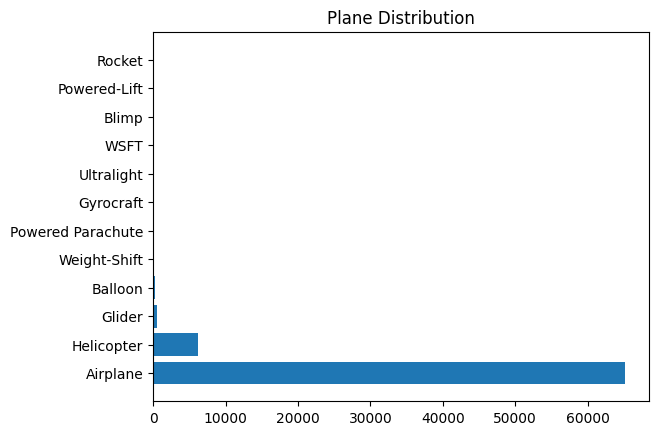

In [574]:
#analyzing the distribution of type of planes in our dataset
plane_types=df_eda['aircraft_category'].value_counts().index
plane_counts=df_eda['aircraft_category'].value_counts()

#visualizing this data
plt.barh(plane_types,plane_counts)
plt.title('Plane Distribution')
# plt.xlabel('Number of Planes',color='g')
# plt.ylabel('Type of Plane',color='g')
plt.show()



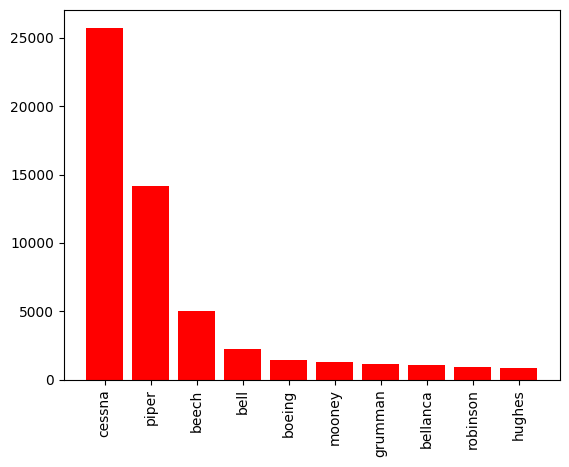

In [575]:
#check the distribution of plane brands (make column)
#Analyzing aircraft make and model, #Analyzing aircraft make and model, most common plane makeand model
y=df_eda['make'].value_counts()[:10]
x=df_eda['make'].value_counts()[:10].index

#Visualize using top 10  brands using bar plots
plt.bar(x,y,color='r')
# plt.xlabel('Plane Brand')
plt.xticks(rotation=90)
# plt.ylabel('Total count')
plt.show()


# 2.Bivariate

Involving 2 columns


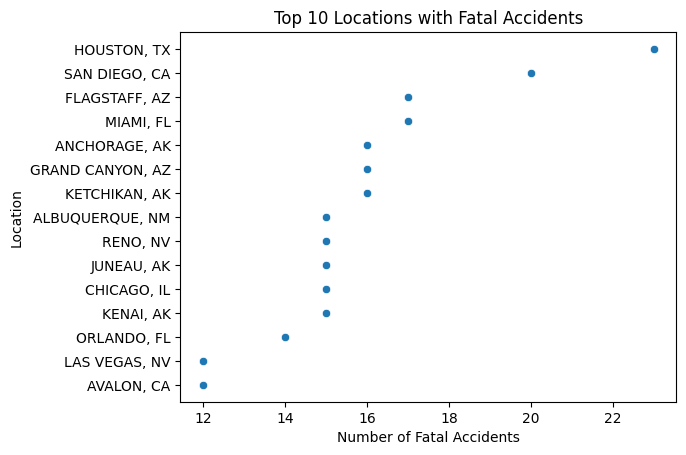

In [576]:
by_location=df_eda[df_eda['injury_severity']=='Fatal']['location']
by_location.value_counts()
# Get the top 15 fatal accident locations
blackspots = by_location.value_counts()[:15]

# Plot using Seaborn scatterplot
sns.scatterplot(x=blackspots.values, y=blackspots.index)

# Add labels
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Location')
plt.title('Top 10 Locations with Fatal Accidents')
plt.show()

#Majority of the fatal incidences occurred in Houston,TX


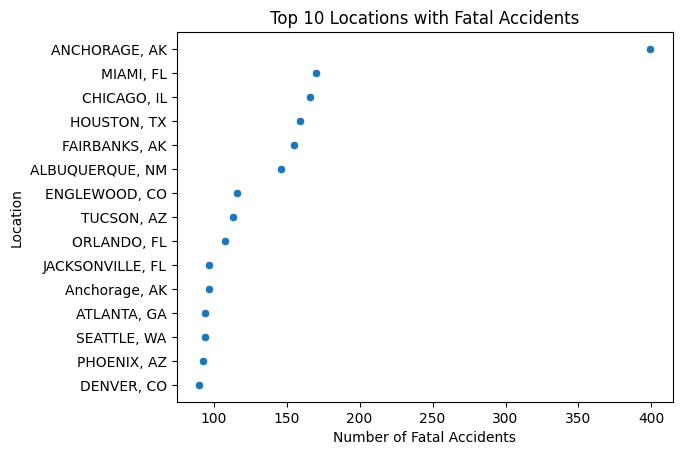

In [577]:
#by location but which planes were mostly involved
by_location_nf=df_eda[df_eda['injury_severity']=='Non-Fatal']['location']

# Get the top 15 fatal accident locations
non_f=by_location_nf.value_counts()[:15]

# Plot using Seaborn scatterplot
sns.scatterplot(x=non_f.values, y=non_f.index)

# Add labels
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Location')
plt.title('Top 10 Locations with Fatal Accidents')
plt.show()

#Anchorage,AK led the way in terms of Non-Fatal Incidences

make    model
cessna  152      2319
        172      1627
        172N     1131
        150       789
        172M      772
Name: count, dtype: int64


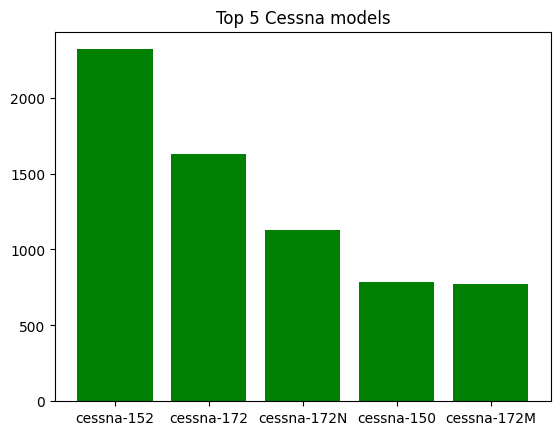

In [578]:
new=df_eda[df_eda['make']=='cessna'][['make','model']]
print(new.value_counts()[:5])#top 5 aircraft brand and mode

#visualize top 5 plane models
x=['cessna-152','cessna-172','cessna-172N','cessna-150','cessna-172M']
y=new['model'].value_counts()[:5]

plt.bar(x,y,color='g')
plt.title('Top 5 Cessna models')
plt.show()
 



Most comon cessna-branded plane was Cessna-152

Most common plane model in our dataset is the Cessna 152


make    model    
cessna  152          2319
        172          1627
        172N         1131
piper   PA-28-140     903
cessna  150           789
Name: count, dtype: int64


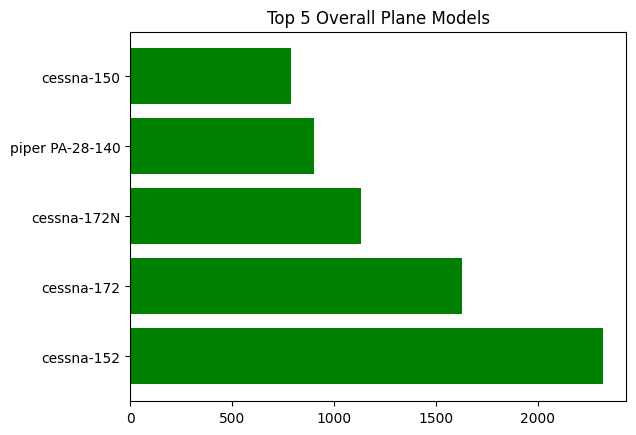

In [579]:
#top 5 overall plane models
model_count=df_eda[['make','model']]
print(model_count.value_counts()[:5])
#visualize the top 5 plane models
x=['cessna-152','cessna-172','cessna-172N','piper PA-28-140','cessna-150']
y=model_count['model'].value_counts()[:5]

plt.barh(x,width=y,color='g')
plt.title('Top 5 Overall Plane Models')
plt.show()

2. Analyze injury_severity

Goal: Investigate patterns in accident severity.

Use bar charts to visualize the frequency of each severity level.

injury_severity
Non-Fatal    59696
Fatal        12658
Incident       134
Name: count, dtype: int64


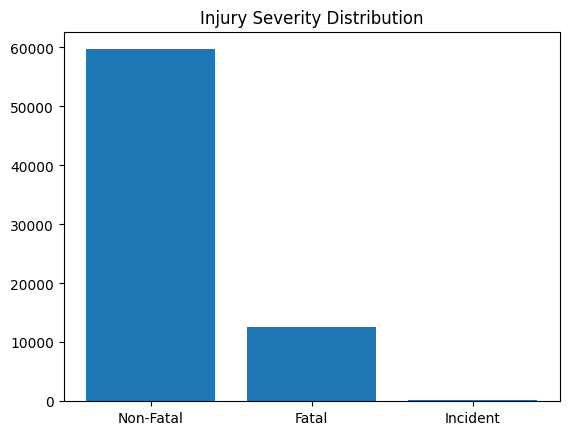

In [580]:
# Analyzing injury severity
print(df_eda['injury_severity'].value_counts())

x=df_eda['injury_severity'].value_counts().index
y=df_eda['injury_severity'].value_counts()
plt.bar(x,y)
plt.title('Injury Severity Distribution')
plt.show()


Majority of the accidents that occurred were Non-Fatal

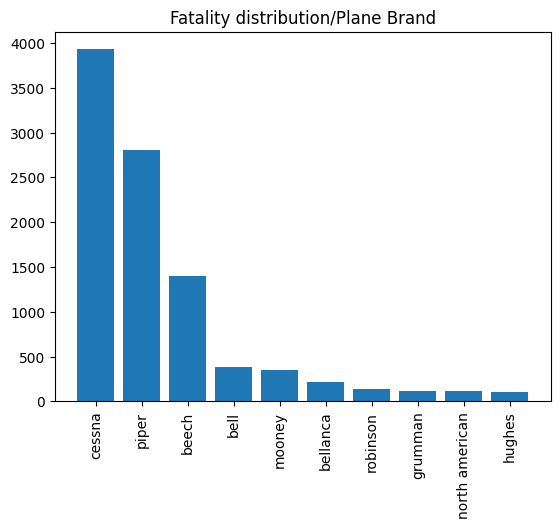

In [581]:
bi_fat_make=df_eda[df_eda['injury_severity']=='Fatal']['make']
bi_fat_make.value_counts()
#visualize this data plane with most fatalities
y=bi_fat_make.value_counts()[:10]
x=bi_fat_make.value_counts()[:10].index
plt.bar(x,y)
plt.title('Fatality distribution/Plane Brand')
# plt.xlabel('Type of Plane')
# plt.ylabel('Number of Fatalities')
plt.xticks(rotation=90)
plt.show()

Cessna as a brand when involved in an accident they were all Fatal when compaired to other brands

make    model
cessna  152      232
        172N     189
        172      138
        172M     124
        172P     100
        150L      78
        182P      73
        182       69
        150       67
        150M      63
Name: count, dtype: int64


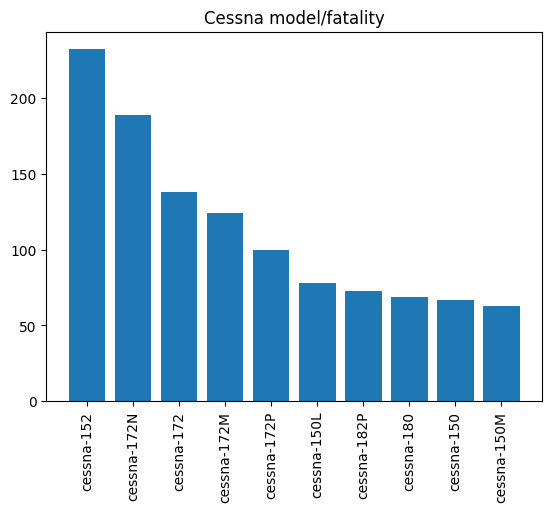

In [582]:
#deeper into the cessna brand
#which model is mostly affected
with_model=df_eda[df_eda['injury_severity']=='Fatal'][['make','model']]
cessna_analysis=with_model[with_model['make']=='cessna']
print(cessna_analysis.value_counts()[:10])
by_model=['cessna-152','cessna-172N','cessna-172','cessna-172M','cessna-172P','cessna-150L','cessna-182P','cessna-180','cessna-150','cessna-150M']
model_counts=[232,189,138,124,100,78,73,69,67,63]
x=by_model
y=model_counts
plt.bar(x,y)
plt.title('Cessna model/fatality')
plt.xticks(rotation=90)
plt.show()

the Cessna 152 accidents led to greater fatalities 

but the cessna 172 and its variants in cumulatively were involved in greater fatalaties

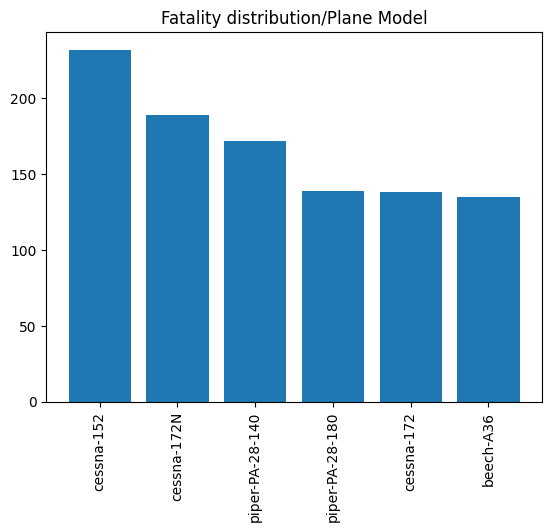

In [583]:

by_model=['cessna-152','cessna-172N','piper-PA-28-140','piper-PA-28-180','cessna-172','beech-A36']
counts=[232,189,172,139,138,135]

#visualize this data plane with most fatalities
x=by_model
y=counts
plt.bar(x,y)
plt.title('Fatality distribution/Plane Model')
# # plt.xlabel('Type of Plane')
# # plt.ylabel('Number of Fatalities')
plt.xticks(rotation=90)
plt.show()

Bombardier brand was not involved in any Fatal incident


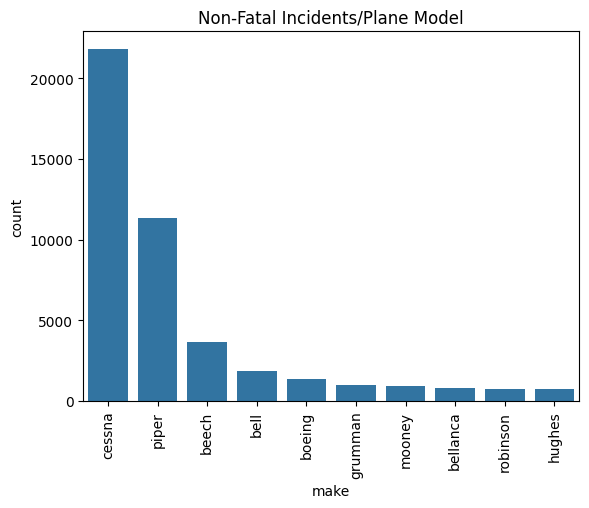

In [584]:
#analyze by non-fatalities
non_fatal=df_eda[df_eda['injury_severity']=='Non-Fatal']['make']
non_f=non_fatal.value_counts()[:10]

#visualize this data
sns.barplot(non_f)
plt.xticks(rotation=90)
plt.title('Non-Fatal Incidents/Plane Model')
plt.show()



make      
cessna        3928
piper         2806
beech         1398
bell           385
boeing          83
gulfstream      15
Name: count, dtype: int64


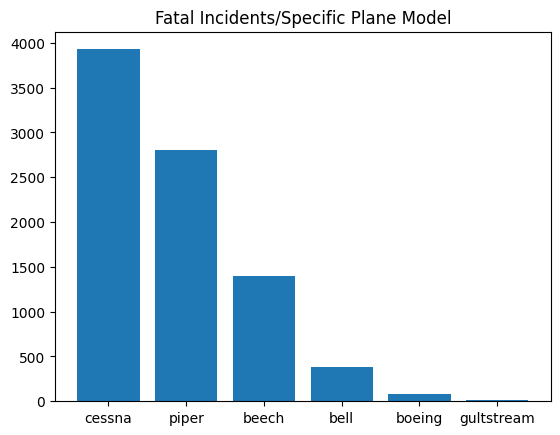

In [585]:
#chosen brands and fatality ratio
with_model=df_eda[df_eda['injury_severity']=='Fatal'][['make']]
specified_analysis=with_model[with_model['make'].isin(['cessna','boeing','beech','piper','bombardier','bell','gulfstream'])]
print(specified_analysis.value_counts())

# visualize this data
plt.bar(['cessna','piper','beech','bell','boeing','gultstream'],[3928,2806,1398,385,83,15])
# plt.xticks(rotation=90)
plt.title('Fatal Incidents/Specific Plane Model')
plt.show()

make      
piper         11319
beech          3634
bell           1881
boeing         1332
bombardier       43
Name: count, dtype: int64


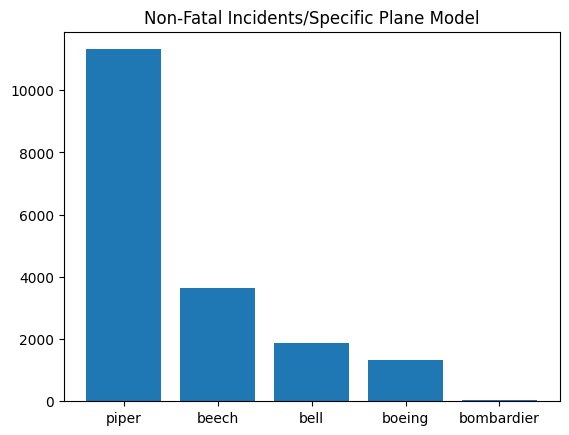

In [586]:
#chosen brands and non-fatality ratio
with_model=df_eda[df_eda['injury_severity']=='Non-Fatal'][['make']]
specified_non_fatal=with_model[with_model['make'].isin(['boeing','beech','piper','bombardier','bell'])]
print(specified_non_fatal.value_counts())

# visualize this data
plt.bar(['piper','beech','bell','boeing','bombardier'],[11319,3634,1881,1332,43])
plt.title('Non-Fatal Incidents/Specific Plane Model')
plt.show()

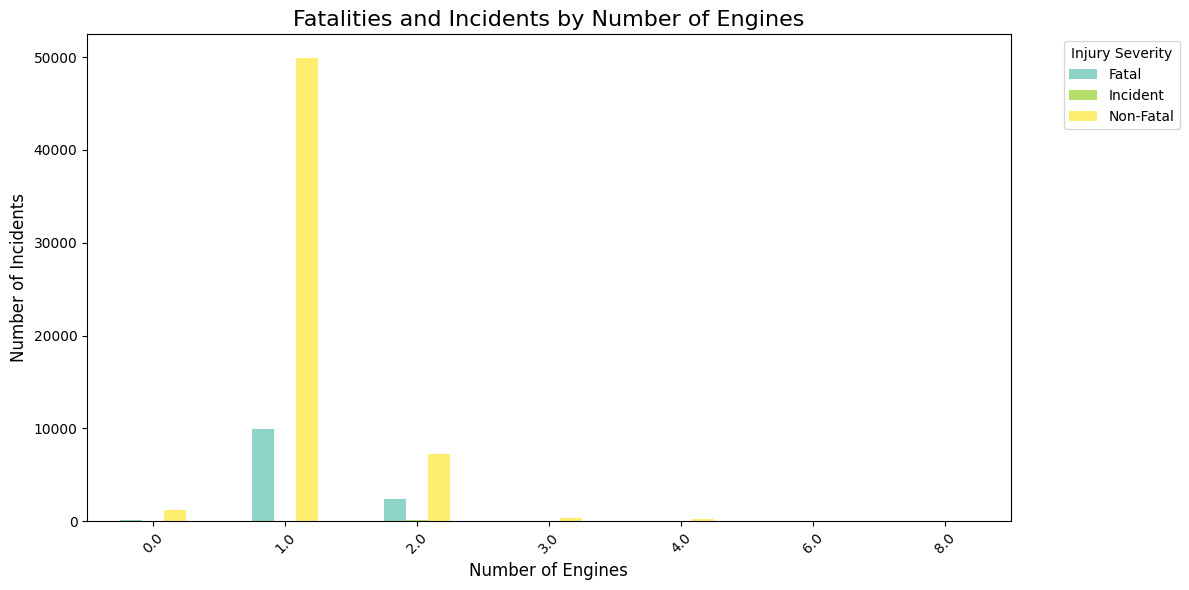

In [587]:
# Group the data by number of engines and injury severity, then count occurrences
engine_fatalities = df_eda.groupby(['number_of_engines', 'injury_severity']).size().unstack(fill_value=0)

# Plot the data as a grouped bar chart
engine_fatalities.plot(kind='bar', figsize=(12,6), colormap='Set3')

# Customize the plot
plt.title('Fatalities and Incidents by Number of Engines', fontsize=16)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




In [588]:
# Step 1: Convert injury severity to numeric form
df_eda['injury_severity_numeric'] = df_eda['injury_severity'].apply(lambda x: 1 if x == 'Non-Fatal' else 0)

# Step 2: Group by number of engines and calculate the sum of incidents
incident_counts = df_eda.groupby('number_of_engines')['injury_severity_numeric'].sum()

# Step 3: Calculate the correlation between the number of engines and the number of incidents
correlation = incident_counts.corr(df_eda['number_of_engines'])
print(f"Correlation between number of engines and number of incidents: {correlation}")


Correlation between number of engines and number of incidents: -0.24178397149731398


As the number of engines increases the number of incidents reduces

this was further proven by the mathematical method above

there was a Negative correlation (close to -1): As the number of engines increases, the number of incidents decreases.

possible reasons:
Multi-engine aircraft are designed with redundancy in mind, meaning if one engine fails, the remaining engines can continue to provide the necessary power to keep the aircraft in the air, and this redundancy significantly reduced the chances of a catastrophic failure.

Multi-engine aircraft often have better maneuverability and performance capabilities in adverse conditions. For example, in poor weather or during takeoff, the additional engines allow for better control, making it easier for pilots to respond to sudden changes or failure scenarios.

Pilots flying multi-engine aircraft undergo more extensive training, especially in emergency situations such as engine failure. This training focuses on how to handle situations where one engine fails while the other(s) continue to operate

So to choose a plane thats safer go for one with increased number of engines

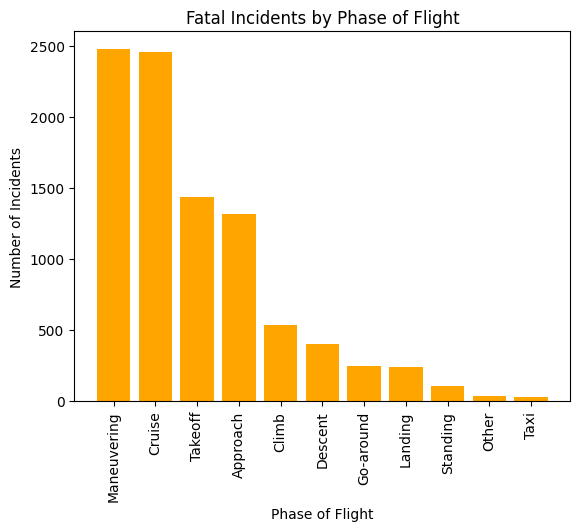

In [589]:
phase_flight = df_eda[df_eda['injury_severity'] == 'Fatal']['phase_of_flight']

# Exclude 'Unknown' values
fatal_phase_flight = phase_flight[phase_flight != 'Unknown']

# Count the occurrences of each phase
phase_counts = fatal_phase_flight.value_counts()

# Visualize the counts
plt.bar(phase_counts.index, phase_counts.values, color='orange')
plt.title('Fatal Incidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

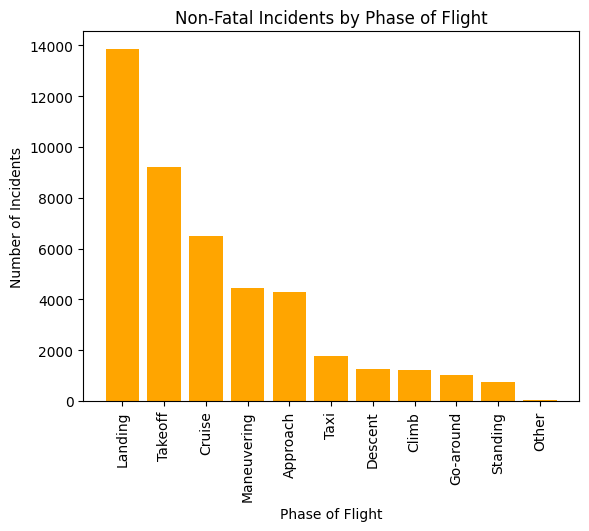

In [590]:
#phase of flight
phase_flight = df_eda[df_eda['injury_severity'] == 'Non-Fatal']['phase_of_flight']

# Exclude 'Unknown' values
fatal_phase_flight = phase_flight[phase_flight != 'Unknown']

# Count the occurrences of each phase
phase_counts = fatal_phase_flight.value_counts()

# Visualize the counts
plt.bar(phase_counts.index, phase_counts.values, color='orange')
plt.title('Non-Fatal Incidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()


Most fatal incidents occur during the maneuvering phase of flight, while non-fatal incidents are more common during landing

Fatal Incidents During Maneuvering: The maneuvering phase of flight typically involves complex, high-stress situations such as sharp turns, altitude changes, or other dynamic maneuvers that place high demands on the aircraft and crew.

Non-Fatal Incidents During Landing: Landings, while still a critical phase of flight, typically involve lower speeds and altitudes, which may contribute to fewer fatal outcomes in cases of accidents. While many accidents during landing might still cause injuries or aircraft damage, pilots often have more control and time to manage issues. 

### **Implications for Choosing the Most Appropriate Plan**

Since the maneuvering phase is where fatal incidents are most common, choosing aircraft with robust safety systems designed for this phase of flight is crucial

Aircraft Durability During Landing: For non-fatal incidents during landing, choosing an aircraft with a reputation for robust landing gear, excellent braking systems, and superior low-speed control could reduce the risk of injury or damage. Planes with landing gear designed to withstand hard landings and advanced terrain navigation capabilities may be preferable in this case.


# 3.Multivariate

Multiple columns

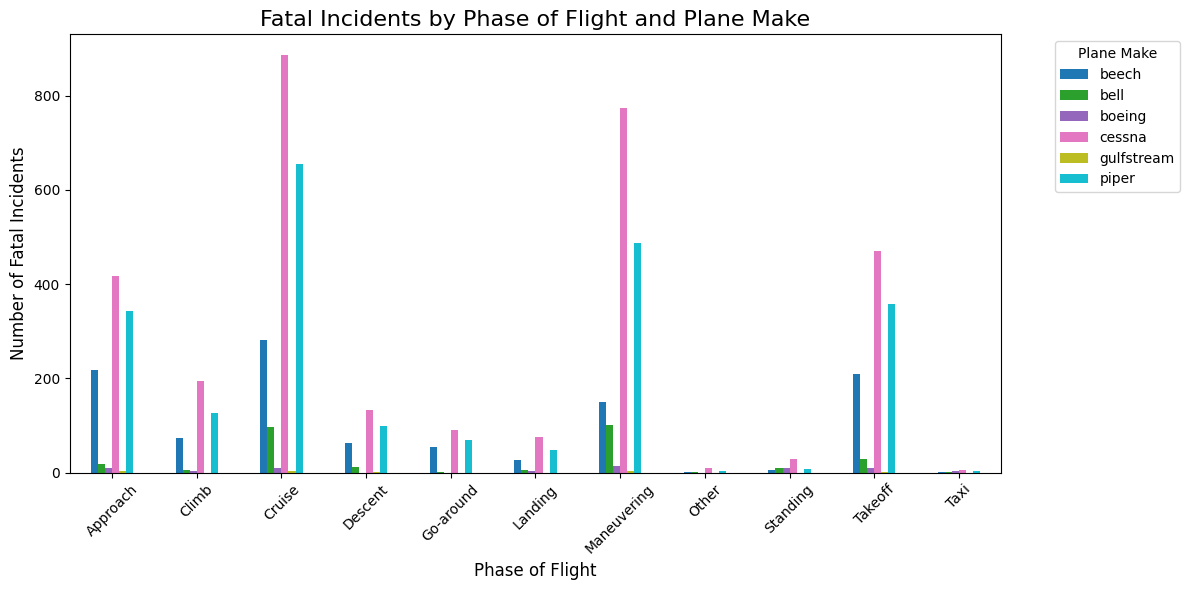

In [591]:
# Filter for fatal incidents in relation to phase of flight and selected make of plane
phase_flight = df_eda[df_eda['injury_severity'] == 'Fatal'][['phase_of_flight', 'make']]

# Exclude 'Unknown' values in 'phase_of_flight'
phase_flight = phase_flight[phase_flight['phase_of_flight'] != 'Unknown']

# Filter for specific plane makes
selected_makes = ['cessna', 'boeing', 'beech', 'piper', 'bombardier', 'bell', 'gulfstream']
filtered_data = phase_flight[phase_flight['make'].isin(selected_makes)]

# Count incidents by phase and make
phase_make_counts = filtered_data.groupby(['phase_of_flight', 'make']).size().unstack(fill_value=0)

# Plot grouped bar chart
phase_make_counts.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Add labels and title
plt.title('Fatal Incidents by Phase of Flight and Plane Make', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Fatal Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plane Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


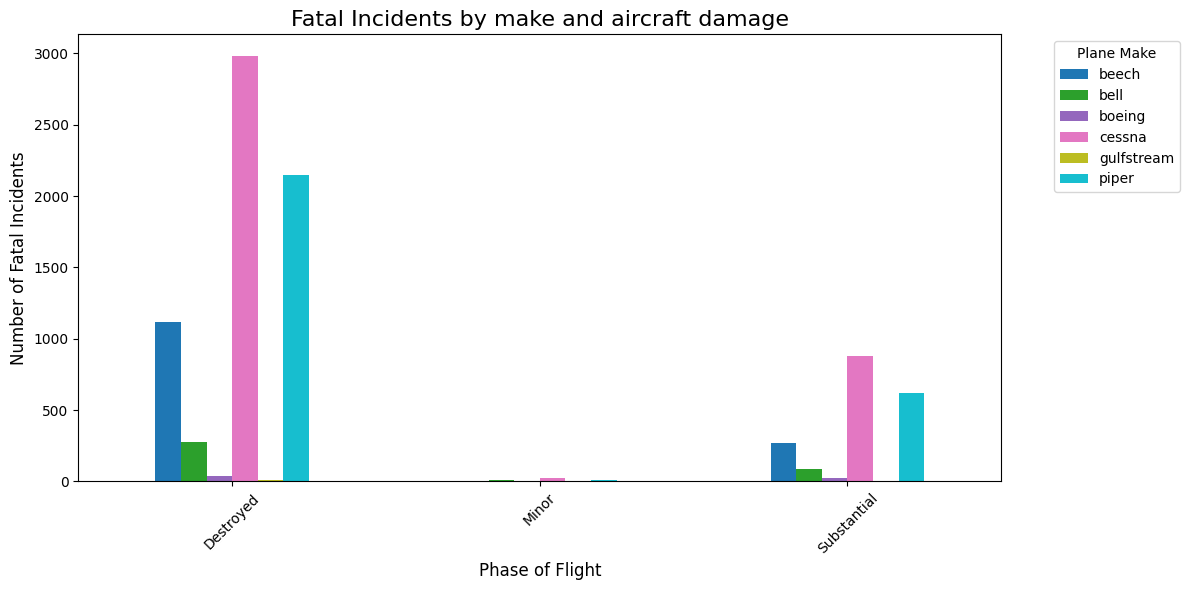

In [592]:
# Filter for total_fatal_injuries
phase_flight = df_eda[df_eda['injury_severity'] == 'Fatal'][['aircraft_damage', 'make']]

# Exclude 'Unknown' values in 'aircraft_damage'
phase_flight = phase_flight[phase_flight['aircraft_damage'] != 'Unknown']

# Filter for specific plane makes
selected_makes = ['cessna', 'boeing', 'beech', 'piper', 'bombardier', 'bell', 'gulfstream']
filtered_data = phase_flight[phase_flight['make'].isin(selected_makes)]

# Count incidents by phase and make
phase_make_counts = filtered_data.groupby(['aircraft_damage', 'make']).size().unstack(fill_value=0)

# Plot grouped bar chart
phase_make_counts.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Add labels and title
plt.title('Fatal Incidents by make and aircraft damage', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Fatal Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plane Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


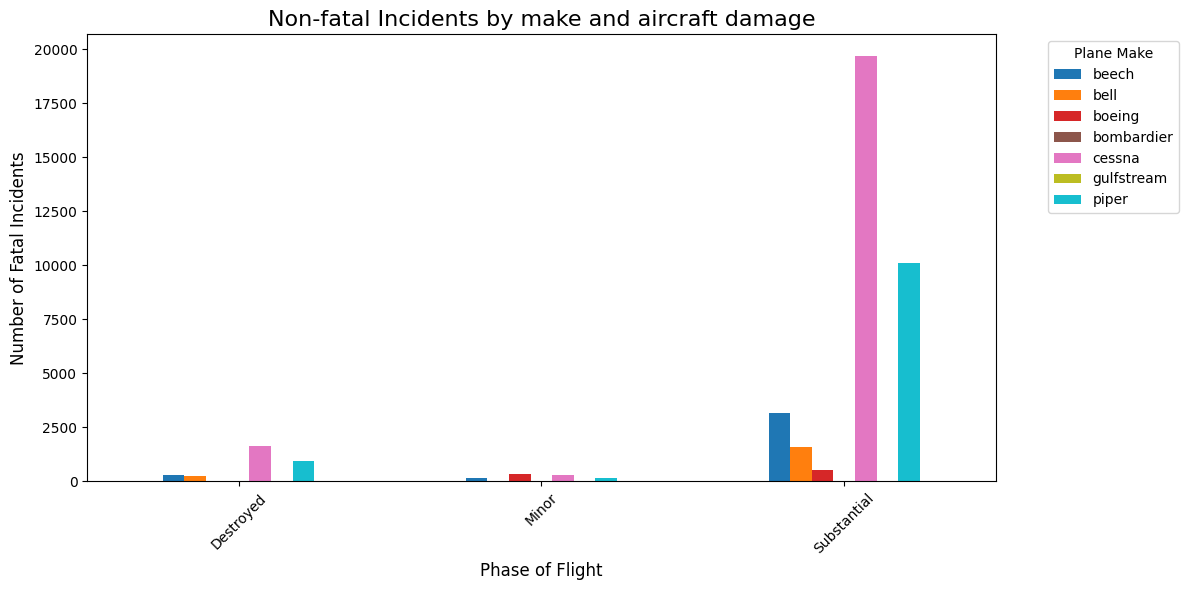

In [593]:
# Filter for total_fatal_injuries
phase_flight = df_eda[df_eda['injury_severity'] == 'Non-Fatal'][['aircraft_damage', 'make']]

# Exclude 'Unknown' values in 'aircraft_damage'
phase_flight = phase_flight[phase_flight['aircraft_damage'] != 'Unknown']

# Filter for specific plane makes
selected_makes = ['cessna', 'boeing', 'beech', 'piper', 'bombardier', 'bell', 'gulfstream']
filtered_data = phase_flight[phase_flight['make'].isin(selected_makes)]

# Count incidents by phase and make
phase_make_counts = filtered_data.groupby(['aircraft_damage', 'make']).size().unstack(fill_value=0)

# Plot grouped bar chart
phase_make_counts.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Add labels and title
plt.title('Non-fatal Incidents by make and aircraft damage', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Fatal Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plane Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Goals:

Identify and recommend the safest, lowest-risk aircraft for commercial and private aviation to help expand into new markets while minimizing potential financial and reputational risks associated with aviation accidents.-injuries

In our Bivariate analysis there was a Negative correlation (close to -1): which means As the number of engines increases, the number of incidents decreases

Therefore choose a plane with more than one engine, further solidifying my choice as ['Bombardier]

Analyze historical aviation accident data to determine patterns and identify aircraft models associated with the highest and lowest risks.

['cessna']:

Was the plane involved in many incidents that were fatal, Was the most implicated by fatality as a result of maneuverability

['Maneuvering]-Planes were most at risk of incident when maneuvering(with majority of fatal-incidents),cruise,takeoff,Approach and climb

Investigate the relationship between accident frequency and the severity of passenger and crew injuries to prioritize safety features in aircraft


